# Модель черного тела

Создать модель абсолютно черного тела и построить траекторию прохождения электромагнитного излучения через модель.

На выходе моделирования необходимо расчитать сколько излучения поглощается, рассеивается.

Задать температуру черного тела и получить спектр черного тела у выходящего из отверстия электромагнитного излучения.

$R_\lambda = \frac{2\pi hc^2}{\lambda^5} \frac{1}{e^{{hc}/{\lambda k T}} - 1}$

In [414]:
from scipy.constants import h, c, k, micro
import numpy as np


def blackbody_radiation(l, t):
    a = 2 * np.pi * h * c ** 2
    b = h * c / (l * k * t)
    return a / ((l ** 5) * (np.exp(b) - 1))

In [415]:
import matplotlib.pyplot as plt


def analyze():
    temperatures = np.linspace(1e3, 12e3, 6)
    lambdas = np.linspace(0.05, 1, 10000) * micro
    for t in temperatures:
        plt.plot(lambdas, blackbody_radiation(lambdas, t))
        plt.xlabel('$\lambda$')
        plt.ylabel('$R(\lambda, T)$')

In [416]:
class Trajectory:
    # ax + by + c = 0
    # x^2 + y^2 = r^2
    eps = 1e-6

    def __init__(self, x0: float, line_coef: tuple, r: float):
        self.line_coef = line_coef
        self.r = r
        self.point = (x0, self.line_value(line_coef, x0))

    @staticmethod
    def line_coefficients(p0: tuple, p1: tuple):
        # (x - x1) / (x2 - x1) - (y - y1) / (y2 - y1) = 0
        x1, y1 = p0
        x2, y2 = p1
        return 1 / (x2 - x1), -1 / (y2 - y1), y1 / (y2 - y1) - x1 / (x2 - x1)

    @staticmethod
    def line_value(line_coef: tuple, x0: float):
        a, b, c = line_coef
        return -(a * x0 + c) / b

    def solve(self):
        a, b, c = self.line_coef
        s = (a ** 2 + b ** 2)
        x0 = -a * c / s
        y0 = -b * c / s
        if c ** 2 > self.r ** 2 * s + self.eps or np.abs(c ** 2 - self.r ** 2 * s) < self.eps:
            raise ValueError('line don\'t have 2 intersection points with circle')
        else:
            d = self.r ** 2 - c ** 2 / s
            mult = np.sqrt(d / s)
            return (x0 + b * mult, y0 - a * mult), (x0 - b * mult, y0 + a * mult)

    @staticmethod
    def perpendicular_line_coef(line_coef: tuple, p0: tuple):
        """accepts intersection point"""
        a, b, c = line_coef
        x, y = p0
        return -b, a, b * x - a * y

    def draw(self):
        lims = [-6, 6]
        p = np.linspace(lims[0], lims[1], 100)
        fig = plt.figure()
        ax = fig.add_subplot()
        ax.scatter(self.point[0], self.point[1], c='r')  # current point
        ax.scatter(0, 0, c='r')  # center
        intersection_points = self.solve()
        transposed = np.transpose(intersection_points)
        ax.scatter(transposed[0], transposed[1], c='r')
        radius_line1 = self.line_coefficients((0, 0), intersection_points[0])
        perpendicular = self.perpendicular_line_coef(radius_line1, intersection_points[0])
        ax.plot(p, self.line_value(perpendicular, p))
        radius_line2 = self.line_coefficients((0, 0), intersection_points[1])
        perpendicular = self.perpendicular_line_coef(radius_line2, intersection_points[1])
        ax.plot(p, self.line_value(perpendicular, p))
        ax.plot(p, self.line_value(self.line_coef, p))
        plt.gcf().gca().add_artist(
            plt.Circle((0, 0), self.r, fill=False)
        )
        ax.set_aspect('equal', adjustable='box')
        plt.xlim(lims)
        plt.ylim(lims)

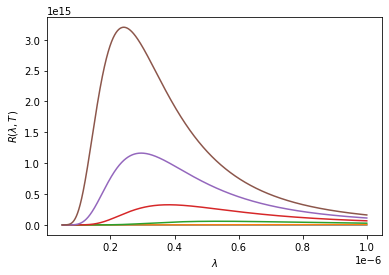

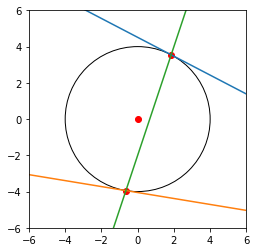

In [417]:
if __name__ == '__main__':
    trajectory = Trajectory(-3, (-3, 1, 2), 4)
    analyze()
    trajectory.draw()